In [1]:
from cellpose import models, io
import skimage as sk
import matplotlib.pyplot as plt
import napari
import numpy as np

https://cellpose.readthedocs.io/en/latest/#

In [2]:
model = models.Cellpose(gpu=False, model_type='cyto')

channels = [0,0] # There is no nucleus, the image is GRAYSCALE. First number would be the channel for the cytoplasm and the second for the nucleus

In [3]:
image = sk.io.imread('./domes/Dome103_processed_n2v2d.tif')
im = image[200]
masks, flows, styles, diams = model.eval(im, diameter=None, channels=channels)
viewer = napari.Viewer()
viewer.add_image(im)
viewer.add_image(masks)

<Image layer 'masks' at 0x2a731b72950>

In [7]:
image = sk.io.imread('./domes/domes_n2v/62_denoised.tif')
# mask = []
# c = 1
# for im in image:
#     masks, flows, styles, diams = model.eval(im, diameter=None, channels=channels)
#     mask.append(masks)
#     print(c, end='\r')
#     c+=1
# mask = np.array(mask)

In [16]:
viewer = napari.Viewer()
# viewer.add_image(image)
viewer.add_image(image[4][145:280])
viewer.add_image(np.transpose(image[4][145:280], axes=(2,0,1)))
# viewer.add_image(mask)

<Image layer 'Image [1]' at 0x175642dcf10>

In [8]:
import tifffile as tiff
tiff.imsave('Dome103_denoised_mask_cellpose.tif', mask)

C:\Users\SPIM\AppData\Local\Temp\ipykernel_8388\2587358331.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave('Dome103_denoised_mask_cellpose.tif', mask)


### OPEN THE SAVED MASKS

In [26]:
mask1 = sk.io.imread('./domes/domes_n2v/62_4_collapse_cellpose.tif')
mask2 = sk.io.imread('./domes/domes_n2v/62_4_collapse_cellpose_2.tif')
print(mask1.shape, mask2.shape)

(135, 526, 526) (526, 135, 526)


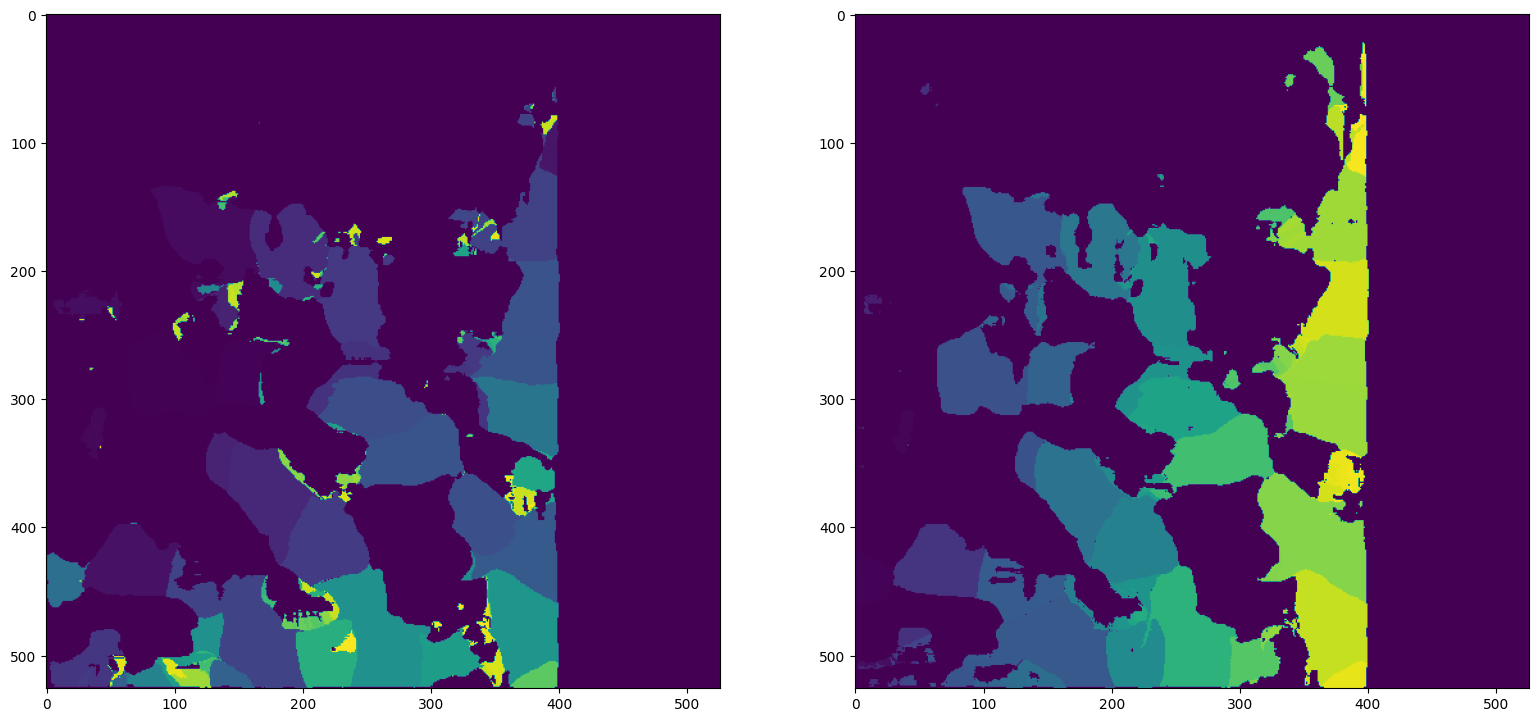

In [27]:
mask2 = np.transpose(mask2, axes=(1,2,0))
plt.figure(figsize=(40,20))
plt.subplot(1,4,1)
plt.imshow(mask1[100])
plt.subplot(1,4,2)
plt.imshow(mask2[100])

In [32]:
viewer = napari.Viewer()
viewer.add_image(mask1)
viewer.add_image(mask2)
viewer.add_image(mask1+mask2)
viewer.add_image(image[4][145:280])

<Image layer 'Image [1]' at 0x1768e18c110>